perceptron valid: [(1, 0.708), (5, 0.738), (10, 0.57), (15, 0.684), (25, 0.754), (50, 0.76)]
best = 0.7600, T=50.0000
avg perceptron valid: [(1, 0.744), (5, 0.762), (10, 0.784), (15, 0.788), (25, 0.792), (50, 0.774)]
best = 0.7920, T=25.0000
Pegasos valid: tune T [(1, 0.678), (5, 0.706), (10, 0.732), (15, 0.728), (25, 0.756), (50, 0.76)]
best = 0.7600, T=50.0000
Pegasos valid: tune L [(0.001, 0.772), (0.01, 0.76), (0.1, 0.708), (1, 0.568), (10, 0.492)]
best = 0.7720, L=0.0010


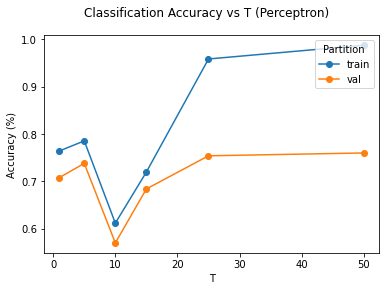

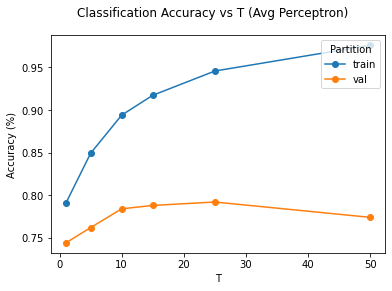

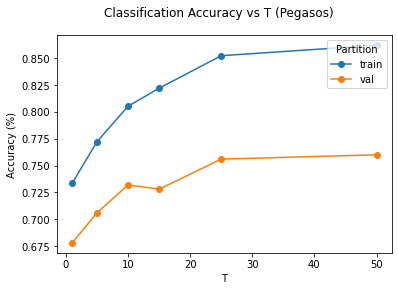

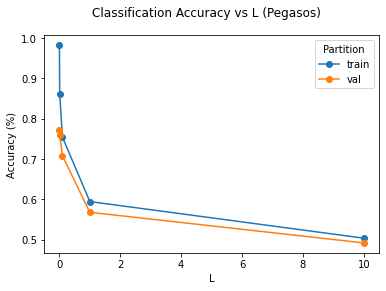

0.74
Most Explanatory Word Features
['delicious', 'great', 'best', 'perfect', 'loves', 'favorite', 'excellent', 'love', 'glad', 'beef']


In [1]:
import project1 as p1
import utils
import numpy as np

#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

#-------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

# toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

# T = 2000
# L = 0.2

# thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
# thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
# thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

# def plot_toy_results(algo_name, thetas):
#     print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
#     print('theta_0 for', algo_name, 'is', str(thetas[1]))
#     utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

# plot_toy_results('Perceptron', thetas_perceptron)
# plot_toy_results('Average Perceptron', thetas_avg_perceptron)
# plot_toy_results('Pegasos', thetas_pegasos)

#-------------------------------------------------------------------------------
# Problem 7
#-------------------------------------------------------------------------------

# T = 10
# L = 0.01

# pct_train_accuracy, pct_val_accuracy = \
#    p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
# print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
# print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

# avg_pct_train_accuracy, avg_pct_val_accuracy = \
#    p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
# print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
# print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

# avg_peg_train_accuracy, avg_peg_val_accuracy = \
#    p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
# print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
# print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

#-------------------------------------------------------------------------------
# Problem 8
#-------------------------------------------------------------------------------

data = (train_bow_features, train_labels, val_bow_features, val_labels)

# values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

# fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

#-------------------------------------------------------------------------------
# Use the best method (perceptron, average perceptron or Pegasos) along with
# the optimal hyperparameters according to validation accuracies to test
# against the test dataset. The test data has been provided as
# test_bow_features and test_labels.
#-------------------------------------------------------------------------------

# Your code here
train_acc, test_acc = p1.classifier_accuracy(p1.pegasos, train_bow_features, test_bow_features, train_labels, test_labels, T=25, L=0.01)
print(test_acc)

#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------
theta, _ = p1.pegasos(train_bow_features, train_labels, 25, 0.01)
best_theta = theta # Your code here
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])